# Setting up environment

In [2]:
FILEDIR = "./"

# Setting up folder to save figures
REPORTDIR = "$FILEDIR/figures/"
mkpath("$REPORTDIR")

# Loading essentials
using JLD

ENV["MPLCONFIGDIR"] = FILEDIR
using PyPlot; const plt = PyPlot
info("Config file $(matplotlib[:matplotlib_fname]())")

rc("svg",fonttype="none")
savefig(x::AbstractString) = PyPlot.savefig(REPORTDIR*"/"*x)
top,bottom,left,right = 0.97,0.07,0.22,0.9

# A tool to find a filename
include("utils/loader.jl")
filefromid(ID::Integer) = filefromid(ID,"$FILEDIR/outdir")

INFO: Config file /home/janiserdmanis/BtSync/Projects/PhD/matplotlibrc


filefromid (generic function with 2 methods)

# Quasiclassical

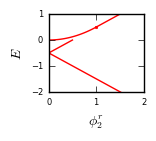

In [2]:
fig = plt.figure()
fig[:set_size_inches](3.487/2.5,3.487/1.618/2.5)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

XLIM = (0,0.3)
YLIM = (-3,0.5)

xlim(0,1.5)
ylim(-2,1)

xticks([0,1,2])
#xticks([0,1,2])
yticks([0,-1,+1,-2])

xlabel(L"\phi^r_{2}")
ylabel(L"E")

Ix,Iy,Iz = 1,1,1
gx,gy,gz = 3,2,1

### z direction
# a=+1
r = collect(0:0.01:3)
φz1 = Iz/gz + r
Ez1 = Iz^2/2/gz + r*Iz
φz2 = collect(0:0.01:Iz/gz)
Ez2 = gz*φz2.^2./2
plt.plot(φz1,Ez1,"-r")
plt.plot(φz2,Ez2,"-r")
plt.plot(maximum(φz2),maximum(Ez2),".r")
# a=-1
φz = collect(0:0.01:4)
Ez = -Iz^2/2/gz - Iz*φz
plt.plot(φz,Ez,"-r")
# a = +1 that line
ϕ3 = collect(0:0.01:1/gz-1/gy)#Iz^2/gz-Ix^2/gx)
Ez3 = -Iz^2/2/gz + Iz*ϕ3
plt.plot(ϕ3,Ez3,"-r")
#Ez1 = Iz^2/2/gz + r*Iz

savefig("easy.svg")


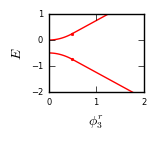

In [3]:
fig = plt.figure(figsize=(0.1,4))
fig[:set_size_inches](3.487/2.5,3.487/1.618/2.5)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

XLIM = (0,0.3)
YLIM = (-3,0.5)


xlim(0,1.5)
ylim(-2,1)

# xlim(0,3)
# ylim(-4,3)

xticks([0,1,2])
yticks([0,-1,+1,-2])
# #xticks([0,1,2])
# yticks([0,-1,+1,-2,-3,-4])

xlabel(L"\phi^r_{3}")
ylabel(L"E")

Ix,Iy,Iz = 1,1,1
gx,gy,gz = 3,2,1


### y direction
# a=+1
r = collect(0:0.01:3)
φy1 = Iy/gy + r
Ey1 = Iy^2/2/gy + Iy*r
φy2 = collect(0:0.01:Iy/gy)
Ey2 = gy*φy2.^2/2
plt.plot(φy1,Ey1,"-r")
plt.plot(φy2,Ey2,"-r")
plt.plot(maximum(φy2),maximum(Ey2),".r")
# a=-1
r = collect(Iz^2/gz/Iy:0.01:7)
φy1 = r - Iy/gy
Ey1 = Iy^2/2/gy - Iy*r
φy2 = collect(0:0.01:Iz/gz/Iy - Iy/gy)
Ey2 = - Iz^2/2/gz - 1/2*Iy^2/(Iz^2/gz - Iy^2/gy)*φy2.^2
plt.plot(φy1,Ey1,"-r")
plt.plot(φy2,Ey2,"-r")
plt.plot(maximum(φy2),minimum(Ey2),".r")

savefig("hard.svg")


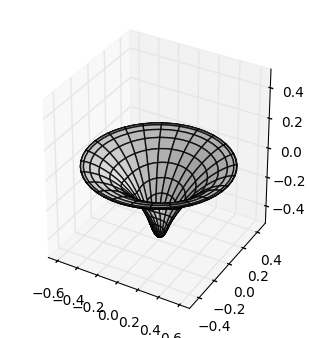

In [3]:
# TeX labels
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':6})
#rc('text', usetex=True)
#rc('xtick',labelsize=6)

g1=3.
g2=2.
g3=1.
eps=1.e-3

# calculations for plotting the POTATO stats here

function rmin(u)
    "minimal radius from zeros of the determinant of the Hessian of classical energy"
    u1=u[1]
    u2=u[2]
    u3=u[3]
    s2=g1 * u1^2 + g2 * u2^2 + g3 * u3^2;
    s1=-(g1*g2+g1*g3+g2*g3) + g1*g2*u3^2 + g1*g3*u2^2 + g2*g3*u1^2;
    s0=g1*g2*g3;
    discr=s1^2-4*s0*s2
    #if discr > 0
        q0 = (-s1+(s1^2-4*s0*s2)^0.5)/2/s2
        q1 = (-s1-(s1^2-4*s0*s2)^0.5)/2/s2
        qq=min(q0,q1)
        ret=1/qq
        #if  ret > 1/g2-eps && ret < 1/g3+eps
        return ret;
        #end
    #end 
end 

function phi1(X)
    theta=X[1]
    phi=X[2]
    u1=sin(theta)*cos(phi)
    u2=sin(theta)*sin(phi)
    u3=cos(theta)
    r=rmin([u1,u2,u3])
    return (r-1/g1)*u1;
end 

function phi2(X)
    theta=X[1]
    phi=X[2]
    u1=sin(theta)*cos(phi)
    u2=sin(theta)*sin(phi)
    u3=cos(theta)
    r=rmin([u1,u2,u3])
    return (r-1/g2)*u2;
end 

function phi3(X)
    theta=X[1]
    phi=X[2]
    u1=sin(theta)*cos(phi)
    u2=sin(theta)*sin(phi)
    u3=cos(theta)
    r=rmin([u1,u2,u3])
    return (r-1/g3)*u3;
end 

# save data for potato in an array
NN=50
ths=linspace(0,pi/2,NN)
phs=linspace(0,2*pi,NN)

pp=Iterators.product(ths,phs)
P1=map(phi1,pp)

pp=Iterators.product(ths,phs)
P2=map(phi2,pp)

pp=Iterators.product(ths,phs)
P3=map(phi3,pp)

P1=reshape(P1,(NN,NN))
P2=reshape(P2,(NN,NN))
P3=reshape(P3,(NN,NN))

# calculate disc region as a surface
ph1d(X)=(1/g3-1/g1)*X[1]*cos(X[2]); 
ph2d(X)=(1/g3-1/g2)*X[1]*sin(X[2]);
ph3d(X)=0;

rs=linspace(0,1,NN)
ps=linspace(0,2*pi,NN)

pp=Iterators.product(rs,ps)
P1a=map(ph1d,pp)

pp=Iterators.product(rs,ps)
P2a=map(ph2d,pp)

pp=Iterators.product(rs,ps)
P3a=map(ph3d,pp)

P1a=reshape(P1a,(NN,NN))
P2a=reshape(P2a,(NN,NN))
P3a=reshape(P3a,(NN,NN))

# Plotting starts here

fig2 = plt.figure()
fig2[:set_size_inches]([3.487,2*3.487/1.618])
#plt.tick_params(labelsize=6)

#ax = fig2[:add_subplot](111),# projection="3d")
#ax[:set_xlabel]("phi_1^r")
#ax[:set_ylabel]("phi_2^r")
#ax[:set_zlabel]("phi_3^r")

# plot disc region
#plot_surface(P1a,P2a,P3a,alpha=1,color="r")
#ax[:plot_surface](P1a, P2a, P3a,alpha=1,color="r")
# plot potato
#ax.plot_wireframe(P1, P2, P3)
#ax.plot_wireframe(P1l, P2l, P3l)

#ax.plot_surface(P1l, P2l, P3l,rstride=1,cstride=1,color="w")
plot_surface(P1, P2, P3,rstride=4,cstride=2,color="w",alpha=0.8)

ax = gca()
ax[:set_xlim](1/g1-1/g3,1/g3-1/g1)
ax[:set_ylim](1/g2-1/g3,1/g3-1/g2)
ax[:set_zlim](1/g2-1/g3,1/g3-1/g2)


#ax[:view_init](100,30)

savefig("fig2bot.svg")


# Energy plots

$g_{x,y,z}=3,2,1;$
$\alpha_{x,y,z}=1,1,1$

## Four terminal junction

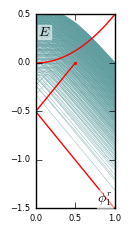

In [12]:
#ID = 1804111331
ID = 1804121634

# Variables used in the dataset
gx,gy,gz = 3,2,1
Cx,Cy,Cz = (1,1,1).*100
αx,αy,αz = (1,1,1)

NLEVELS = 300
FMT = "-"
AXIS = "z"
COLOR = "cadetblue"

fig = figure()
fig[:set_size_inches](3.487/3,3.487/1.618)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

xticks([0,0.5,1])
#yticks([-1,0])

xlim(0,1)
ylim(-1.5,+0.5)

FNAME = filefromid(ID)

### For quasiclassical plot and rescaling of axis
### Compatibility with a new way of storing data
if typeof(load(FNAME,"results$AXIS")[1]) <: Array
    res = [Dict(:EVALS=>i) for i in load(FNAME,"results$AXIS")]
    ϕ = AXIS in ["x","y","z"] ? collect(Iterators.product(load(FNAME,"knots$AXIS")...))[:] : collect(zip(load(FNAME,"knots$AXIS")...))
else
    res = load(FNAME,"results$AXIS")
    ϕ = collect(load(FNAME,"knots$AXIS"))[:]
end

absϕ = [sqrt((x/sqrt(2)/(gx*Cx)^(1/4))^2+(y/sqrt(2)/(gy*Cy)^(1/4))^2+(z/sqrt(2)/(gz*Cz)^(1/4))^2) for (x,y,z) in ϕ]

### Here I can change different variables
#Ei = hcat([i[:EVALS][:] for i in res]...)
El = []

for i in res
    Eres = i[:EVALS]
    push!(El,Eres)
end

Ei = hcat([i[:] for i in El]...)
for j in 1:size(Ei,2)
    Ei[:,j] = Ei[sortperm(Ei[:,j]),j]
end

for i in 1:(isnan(NLEVELS) ? length(Ei[:,1]) : NLEVELS)
    plot(absϕ,Ei[i,:],FMT,color=COLOR,lw=0.25)
end

### Quasicalssical plot in easy direction
### Quasicalssical plot
Ix,Iy,Iz = αx,αy,αz
# a=+1
r = collect(0:0.01:3)
φz1 = Iz/gz + r
Ez1 = Iz^2/2/gz + r*Iz
φz2 = collect(0:0.01:Iz/gz)
Ez2 = gz*φz2.^2./2
plt.plot(φz1,Ez1,"-r")
plt.plot(φz2,Ez2,"-r")
#plt.plot(maximum(φz2),maximum(Ez2),".r")
# a=-1
φz = collect(0:0.01:4)
Ez = -Iz^2/2/gz - Iz*φz
plt.plot(φz,Ez,"-r")
# a = +1 that line
ϕ3 = collect(0:0.01:Iz^2/gz-Ix^2/gy)
Ez3 = -Iz^2/2/gz + Iz*ϕ3
plt.plot(ϕ3,Ez3,"-r")#
plt.plot(maximum(ϕ3),maximum(Ez3),".r")


t = figtext(0.24,0.87,L"E")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"\phi^r_1")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

savefig("energiesxycolumb-easy.svg")

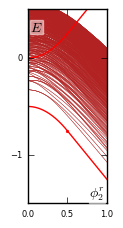

In [14]:
ID = 1804121634

# Variables used in the dataset
gx,gy,gz = 3,2,1
Cx,Cy,Cz = (1,1,1).*100
αx,αy,αz = (1,1,1)

NLEVELS = 300
FMT = "-"
AXIS = "y"
COLOR = "firebrick"

fig = figure()
fig[:set_size_inches](3.487/3,3.487/1.618)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

xticks([0,0.5,1])
yticks([-1,0])

xlim(0,1)
ylim(-1.5,+0.5)

FNAME = filefromid(ID)

### For quasiclassical plot and rescaling of axis
### Compatibility with a new way of storing data
if typeof(load(FNAME,"results$AXIS")[1]) <: Array
    res = [Dict(:EVALS=>i) for i in load(FNAME,"results$AXIS")]
    ϕ = AXIS in ["x","y","z"] ? collect(Iterators.product(load(FNAME,"knots$AXIS")...))[:] : collect(zip(load(FNAME,"knots$AXIS")...))
else
    res = load(FNAME,"results$AXIS")
    ϕ = collect(load(FNAME,"knots$AXIS"))[:]
end

absϕ = [sqrt((x/sqrt(2)/(gx*Cx)^(1/4))^2+(y/sqrt(2)/(gy*Cy)^(1/4))^2+(z/sqrt(2)/(gz*Cz)^(1/4))^2) for (x,y,z) in ϕ]

### Here I can change different variables
#Ei = hcat([i[:EVALS][:] for i in res]...)
El = []

for i in res
    Eres = i[:EVALS]
    push!(El,Eres)
end

Ei = hcat([i[:] for i in El]...)
for j in 1:size(Ei,2)
    Ei[:,j] = Ei[sortperm(Ei[:,j]),j]
end

for i in 1:(isnan(NLEVELS) ? length(Ei[:,1]) : NLEVELS)
    plot(absϕ,Ei[i,:],FMT,color=COLOR,lw=0.25)
end

### Quasicalssical plot in easy direction
### Quasicalssical plot
AXIS = "y"
COLOR = "firebrick"
FMT = "-"
gx,gy,gz = 3,2,1
Cx,Cy,Cz = (1,1,1).*100
αx,αy,αz = (1,1,1)

El = []

for i in res
    Eres = i[:EVALS]
    push!(El,Eres)
end

Ei = hcat([i[:] for i in El]...)
for j in 1:size(Ei,2)
    Ei[:,j] = Ei[sortperm(Ei[:,j]),j]
end

for i in 1:(isnan(NLEVELS) ? length(Ei[:,1]) : NLEVELS)
    plot(absϕ,Ei[i,:],FMT,color=COLOR,lw=0.25)
end


### Quasicalssical plot
Ix,Iy,Iz = 1,1,1
#gx,gy,gz = 3/4,2/4,1/4

### a=+1
r = collect(0:0.01:3)
φy1 = Iy/gy + r
Ey1 = Iy^2/2/gy + Iy*r
φy2 = collect(0:0.01:Iy/gy)
Ey2 = gy*φy2.^2/2

plt.plot(φy1,Ey1,"-r")
plt.plot(φy2,Ey2,"-r")
#plt.plot(maximum(φy2),maximum(Ey2),".r")

### a=-1
r = collect(Iz^2/gz/Iy:0.01:7)
φy1 = r - Iy/gy
Ey1 = Iy^2/2/gy - Iy*r
φy2 = collect(0:0.01:Iz/gz/Iy - Iy/gy)
Ey2 = - Iz^2/2/gz - 1/2*Iy^2/(Iz^2/gz - Iy^2/gy)*φy2.^2
 
ϕ = [φy2;φy1]
Ey = [Ey2;Ey1]

plot(ϕ,Ey,"-r",lw=1)
plt.plot(maximum(φy2),minimum(Ey2),".r")


t = figtext(0.24,0.87,L"E")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"\phi^{r}_2")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

savefig("energiesxycolumb-orthognal.svg")

## Exciton setup

Ground state energy is being added to all energy levels

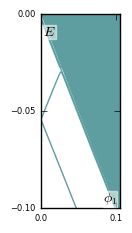

In [15]:
ID = 1802121252

NLEVELS = 4
N = 300
ΔN = 10
N = N-ΔN,N,N+ΔN

fig = figure(figsize=(0.1,4))
fig[:set_size_inches](3.487/3,3.487/1.618)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

xticks([0,0.1])
yticks([-0.6,-0.55,-0.5].+1/2)

#plt.xlabel(L"\phi_0")
#plt.ylabel(L"E")

xlim(0,0.105)
ylim(-0.6+1/2,-0.5+1/2)


FNAME = filefromid(ID)

FMT = "-"
AXIS = "x"
COLOR = "cadetblue"


### Compatibility with a new way of storing data
if typeof(load(FNAME,"results$AXIS")[1]) <: Array
    res = [Dict(:EVALS=>i) for i in load(FNAME,"results$AXIS")]
    ϕ = AXIS in ["x","y","z"] ? collect(Iterators.product(load(FNAME,"knots$AXIS")...))[:] : collect(zip(load(FNAME,"knots$AXIS")...))
else
    res = load(FNAME,"results$AXIS")
    ϕ = collect(load(FNAME,"knots$AXIS"))[:]
end

### Theese lines could be scrambled directly from results and knots object
absϕ = [sqrt(x^2+y^2+z^2) for (x,y,z) in ϕ]

#ax = plt.gca()
#ax[:set_yscale]("log")

El = []

"""
Extrapolation from the ground state
"""
function extrapolate(x,y)
    x1,x2 = x[1],x[2]
    y1,y2 = y[1],y[2]

    A = (x1^3*y2 - x2^3*y1)/(x1^3-x2^3)
    B = (y1-y2)/(x1^3-x2^3)

    return A
end

for i in res
    # E1 = i[:E1]
    # E2 = i[:E2]
    #Eres = f(1./N,(E1,E2,E3))
    #Eres = extrapolate(1./(N[1],N[2]),(E1,E2))
    #Eres = EXTRAPOLATOR(1./N,(E1,E2,E3))
    Eres = i[:EVALS]
    push!(El,Eres)
end

Ei = hcat([i[:] for i in El]...)

for j in 1:size(Ei,2)
    Ei[:,j] = Ei[sortperm(Ei[:,j]),j]
end

for i in 1:(isnan(NLEVELS) ? length(Ei[:,1]) : NLEVELS)
    plt.plot(absϕ,Ei[i,:]+1/2,FMT,color=COLOR,lw=1)
end

x = collect(0:0.01:0.2)
y = -1/2 - x + 1/2
fill_between(x,y,0,color="cadetblue",lw=0)

#tight_layout()

t = figtext(0.24,0.87,L"E")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"\phi_1")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

savefig("energiesxycolumb-easy.svg")


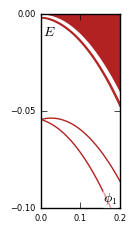

In [16]:
ID = 1802121252

NLEVELS = 4
N = 300
ΔN = 10
N = N-ΔN,N,N+ΔN

fig = figure(figsize=(0.1,4))
fig[:set_size_inches](3.487/3,3.487/1.618)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

xticks([0,0.1,0.2])
yticks([-0.6,-0.55,-0.5].+1/2)

#plt.xlabel(L"\phi_0")
#plt.ylabel(L"E")

xlim(0,0.2)
ylim(-0.6+1/2,-0.5+1/2)

FNAME = filefromid(ID)

FMT = "-"
AXIS = "y"
COLOR = "firebrick"


### Compatibility with a new way of storing data
if typeof(load(FNAME,"results$AXIS")[1]) <: Array
    res = [Dict(:EVALS=>i) for i in load(FNAME,"results$AXIS")]
    ϕ = AXIS in ["x","y","z"] ? collect(Iterators.product(load(FNAME,"knots$AXIS")...))[:] : collect(zip(load(FNAME,"knots$AXIS")...))
else
    res = load(FNAME,"results$AXIS")
    ϕ = collect(load(FNAME,"knots$AXIS"))[:]
end

### Theese lines could be scrambled directly from results and knots object
absϕ = [sqrt(x^2+y^2+z^2) for (x,y,z) in ϕ]

#ax = plt.gca()
#ax[:set_yscale]("log")

El = []

"""
Extrapolation from the ground state
"""
function extrapolate(x,y)
    x1,x2 = x[1],x[2]
    y1,y2 = y[1],y[2]

    A = (x1^3*y2 - x2^3*y1)/(x1^3-x2^3)
    B = (y1-y2)/(x1^3-x2^3)

    return A
end

for i in res
    # E1 = i[:E1]
    # E2 = i[:E2]
    #Eres = f(1./N,(E1,E2,E3))
    #Eres = extrapolate(1./(N[1],N[2]),(E1,E2))
    #Eres = EXTRAPOLATOR(1./N,(E1,E2,E3))
    Eres = i[:EVALS]
    push!(El,Eres)
end

Ei = hcat([i[:] for i in El]...)

for j in 1:size(Ei,2)
    Ei[:,j] = Ei[sortperm(Ei[:,j]),j]
end

for i in 1:(isnan(NLEVELS) ? length(Ei[:,1]) : NLEVELS)
    plt.plot(absϕ,Ei[i,:]+1/2,FMT,color=COLOR,lw=1)
end

Ix,Iy,Iz = 0,1,1
gx,gy,gz = 0,2,1

a=-1
r = collect(Iz^2/gz/Iy:0.01:7)
φy1 = r - Iy/gy
Ey1 = Iy^2/2/gy - Iy*r
φy2 = collect(0:0.01:Iz/gz/Iy - Iy/gy)
Ey2 = - Iz^2/2/gz - 1/2*Iy^2/(Iz^2/gz - Iy^2/gy)*φy2.^2

ϕ = [φy2;φy1]
Ey = [Ey2;Ey1]

fill_between(ϕ,Ey+1/2,0,color="firebrick",lw=0)


#tight_layout()

t = figtext(0.24,0.87,L"E")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"\phi_1")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

savefig("energiesxycolumb-easy.svg")

# Velocity
## Four terminal superconducting junction
$g=3,2,1;$ $\alpha=1,1,1$; $C=x\cdot(1,1,1)$

where $x$ is re;lated to quasiclassicla parameter
$q = \frac{\alpha^2}{2} \frac{\sqrt{C_1}}{\sqrt{g_1}^3}$:
$$q = \sqrt{x}/2 ; x=4 q^2$$

### Numerics solve a following problem
$H = \hbar \omega b^\dagger b + I \sigma (\phi^0 + b^\dagger + b) $

$$\hbar \omega_i = \sqrt{\frac{g_i}{c_i}}$$  $\hbar \omega_3 = \sqrt{3/x}, \hbar \omega_2 = \sqrt{2/x}, \hbar \omega_1 = \sqrt{1/x} $

$$I_i = \frac{\sqrt{e}}{\sqrt{2} (g_i c_i)^{1/4}}$$
$I_3 = \frac{1}{\sqrt{2} (3 x)^{1/4}}; I_2 = \frac{1}{\sqrt{2} (2 x)^{1/4}}; I_1 = \frac{1}{\sqrt{2} (1 x)^{1/4}};$

$$\phi^0_i  = \sqrt{2} (g_ic_i)^{1/4} \phi_0^r$$
$\phi_3^0 = \sqrt{2} (3 x)^{1/4} \phi_3^r; \phi_2^0 = \sqrt{2} (2 x)^{1/4} \phi_2^r; \phi_1^0 = \sqrt{2} (1 x)^{1/4} \phi_1^r;$

So follows 
$$\frac{dE}{d \phi_i^r}=\frac{d \phi^0_i}{d \phi^r_i} \frac{dE}{d \phi^0_i} =  \sqrt{2} (g_ic_i)^{1/4} \frac{dE}{d \phi^0_i} $$


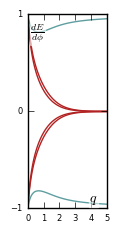

In [17]:
#ID = 1804111410
#ID = 1804121412
ID = 1804121423


fig = figure()
fig[:set_size_inches](3.487/3,3.487/1.618)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
# subplots_adjust(top=0.97,bottom=0.07)

#ID = 1804111249
FNAME = filefromid(ID)
ddata = load("$FNAME","ddata")
q = load("$FNAME","q")

#q = 2*Iz^2/hwz^2./(x.^2)

#x = 1./x


#plt.ylim(-1,+1)


#ax = plt.gca()
#ax[:set_yscale]("log")

for j in 1:2
    #x = [i[2] for i in Is]
    
    DEz = [di[3][j] for di in ddata].*sqrt(2).*(1.*4.*q.^2).^(1/4)
    DEy = [di[2][j] for di in ddata].*sqrt(2).*(2.*4.*q.^2).^(1/4)
    DEx = [di[1][j] for di in ddata].*sqrt(2).*(3.*4.*q.^2).^(1/4)
    
    plot(q,DEz,"-",lw=1,color="cadetblue")
    plot(q,DEy,"-",lw=1,color="firebrick")
    plot(q,DEx,"-",lw=1,color="firebrick")
end
plot([],[],"-",lw=1,color="cadetblue",label="easy")
plot([],[],"-",lw=1,color="firebrick",label="hard")


#subplots_adjust(left=None, bottom=None, right=None, top=None)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

#xticks([0,10,20])
yticks([-1,0,+1])

#legend(fontsize=6)

t = figtext(0.24,0.87,L"\frac{dE}{d\phi}")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"q")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))


savefig("junction-derivatives.svg")


## Exciton

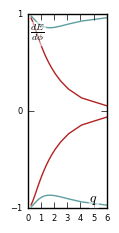

In [18]:
ID = 1802121529

fig = plt.figure(figsize=(0.1,4))
fig[:set_size_inches](3.487/3,3.487/1.618)
subplots_adjust(top=top,bottom=bottom,left=left,right=right)
#subplots_adjust(top=0.97,bottom=0.07,left=0.22)
# subplots_adjust(top=0.97,bottom=0.07)

FNAME = filefromid(ID)
αs = load("$FNAME","αs")
DEx = load("$FNAME","DEx")
DEy = load("$FNAME","DEy")

plt.ylim(-1,+1)

#ax = plt.gca()
#ax[:set_yscale]("log")

for j in 1:2
    #x = [i[2] for i in Is]
    x = 1./αs
    plot(x,DEx[j,:],"-",lw=1,color="cadetblue")
    plot(x,DEy[j,:],"-",lw=1,color="firebrick")
end
plot([],[],"-",lw=1,color="cadetblue",label="easy")
plot([],[],"-",lw=1,color="firebrick",label="hard")

#subplots_adjust(left=None, bottom=None, right=None, top=None)

tick_params(axis="both", which="major", labelsize=6)
tick_params(axis="both", which="minor", labelsize=6)

#xticks([0,5])
yticks([-1,0,+1])

#legend(fontsize=6)

t = figtext(0.24,0.87,L"\frac{dE}{d\phi}")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))

t = figtext(0.75,0.1,L"q")
t[:set_bbox](Dict(:facecolor=>"white", :alpha=>0.5,:edgecolor=>"white",:pad=>0))


savefig("exciton-derivatives.svg")